# Perceptron - IRIS dataset

In [ ]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            ### FILL THIS IN ###
        return self

    def net_input(self, X):
        return np.dot(X, self.w_)

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [ ]:
# If you haven't installed mlxtend yet for ipython
!conda install -c rasbt mlxtend

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regions

ppn = Perceptron(epochs=10, eta=.01)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()

# K-Nearest Neighbor

## KNN Visualization

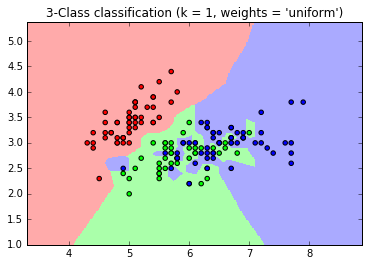

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

### FIX THIS ###
n_neighbors = 1

###############

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## KNN Cross-Validation

In [6]:
from sklearn.metrics import accuracy_score

# Implement 10-fold cross-validation
def knn_cross_validation(X, y, k):
    num_samples = X.shape[0]
    
    accuracies = []
    for i in range(10):
        ### FILL THIS IN ###
        start_split, end_split = None, None
        Xtrain, Ytrain, Xtest, Ytest = [None for _ in range(4)]
        ####################
        
        # Predicts accuracy and appends it to "accuracies" array
        clf = neighbors.KNeighborsClassifier(k)
        clf.fit(Xtrain, Ytrain)
        y_pred = clf.predict(Xtest)
        accuracy = accuracy_score(Ytest, y_pred)
        accuracies.append(accuracy)
        
    return np.mean(accuracies)

In [ ]:
k_list = [1, 5, 10, 15, 20, 25]
for k in k_list:
    print("k: {0}, accuracy: {1}".format(k, knn_cross_validation(X, y, k)))